# National Protected Lands

Last updated: 2016-12-30

Motivated by the recent announcement of the Bears Ears National Monument in Utah, and the Gold Butte National Monument in Nevada.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
%matplotlib inline
sns.set_style('ticks')
sns.set_palette('bright')

## Load Presidential Party Data

Load data for overlaying the party of the President.  Future: overlay the dominant party in the Senate and Congress.  I did this to see how it correlated with park establishment.  I did learn something from this (see conclusion below).

In [2]:
pres = pd.read_csv('presidents.csv') # source: http://textlists.info/us-presidents-in-order-by-term/
print pres.columns

def add_presidents(ax, height=300000):
    colors = {'Democrat': '0',
              'Republican': '1',
              'Other': '0'}
    
    for row in pres.iterrows():
        ax.add_patch(
            patches.Rectangle(
                (row[1]['StartYear'], 0), row[1]['EndYear']-row[1]['StartYear'], height,
                edgecolor="none", facecolor=colors[row[1]['Party']], alpha=0.1, zorder=-100
            )
        )

Index([u'Name', u'StartYear', u'EndYear', u'Party'], dtype='object')


## Load National Parks Data

Import the National Parks data.  This is done in a separate notebook since it requires some data munging steps.  Data is from [Wikipedia's list of US National Parks](https://en.wikipedia.org/w/index.php?title=List_of_national_parks_of_the_United_States).

In [3]:
%run load_nps.ipynb
nps.columns

Index([u'Name', u'Photo', u'Location', u'Date established as park[2][4]',
       u'Area[2]', u'Recreation visitors (2014)[5]', u'Description',
       u'established', u'sqkm', u'year'],
      dtype='object')

Sort the National Park data on the year that it is established.  Add columns for the cumulative total number of parks, and the total area of the National Parks System.

In [4]:
nps_parks_sorted_years = nps.sort_values(['established'])

In [5]:
nps_parks_sorted_years['Cum_Tot'] = np.arange(len(nps_parks_sorted_years))
nps_parks_sorted_years['Cum_Area'] = nps_parks_sorted_years['sqkm'].cumsum()

## National Parks Figures

Now make the figures.

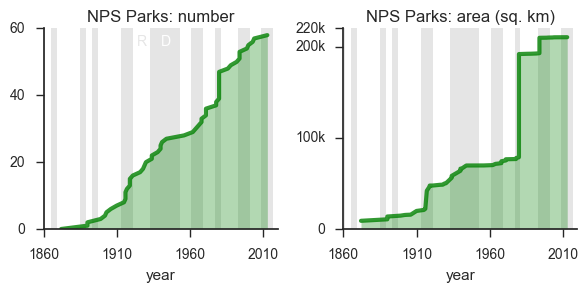

In [6]:
fig = plt.figure(figsize=(6,3))
npax1 = plt.subplot(121)
plt.fill_between(nps_parks_sorted_years['year'], nps_parks_sorted_years['Cum_Tot'],
                 color='g', lw=0, alpha=0.3);
plt.plot(nps_parks_sorted_years['year'], nps_parks_sorted_years['Cum_Tot'],
         color='g', lw=3, alpha=0.8);
sns.despine();
add_presidents(npax1)
plt.xticks(np.arange(1860,2030,50));
plt.yticks([0, 20, 40, 60]);
plt.ylim(0, 60)
plt.xlim(1860, 2020)
plt.xlabel('year')
#plt.ylabel('total number')
plt.title('NPS Parks: number')
plt.annotate('R', (1924, 55), color='0', alpha=0.1)
plt.annotate('D', (1940, 55), color='1')


npax2 = plt.subplot(122)
plt.fill_between(nps_parks_sorted_years['year'], nps_parks_sorted_years['Cum_Area'],
                 color='g', alpha=0.3, lw=0);
plt.plot(nps_parks_sorted_years['year'], nps_parks_sorted_years['Cum_Area'],
         #marker='o', markerfacecolor='w', markeredgecolor='b',
         color='g', lw=3, alpha=0.8);
add_presidents(npax2)
sns.despine();
plt.xticks(np.arange(1860,2030,50));
plt.yticks([0, 100000, 200000, 220000], [0, '100k', '200k', '220k']);
plt.ylim(0, 220000)
plt.xlim(1860, 2020)
plt.xlabel('year');
#plt.ylabel('total area (sq km)');
plt.title('NPS Parks: area (sq. km)');
plt.tight_layout();
plt.savefig('national_parks.png', dpi=300)

About the figures: Total number of parks by year (left).  Total area of parks by year (right).  The gray shaded background areas have a Democrat President (indicated with a 'D' in the left figure), and the other areas have a Republican President.

One feature that is interesting here is that the number of National Parks increases at a fairly consistent rate irrespective of Presidential party.  The large increase in area of National Parks is for the addition of several parks in Alaska.

## National Monuments

In [7]:
%run load_nm.ipynb
nm.columns

126


Index([u'National Monument Name', u'Photo', u'Agency', u'Location',
       u'Date Established', u'Description', u'established', u'year', u'sqkm'],
      dtype='object')

Remove all the really big, but pretty much inaccessible, Marine Preserves.

In [8]:
nm = nm[nm['National Monument Name'] != u'Papahānaumokuākea Marine']
nm = nm[nm['National Monument Name'] != 'Pacific Remote Islands Marine']
nm = nm[nm['National Monument Name'] != 'Northeast Canyons and Seamounts Marine']
nm = nm[nm['National Monument Name'] != 'Marianas Trench Marine']
nm = nm[nm['National Monument Name'] != 'Rose Atoll Marine']

In [9]:
nm_sorted_years = nm.sort_values(['established'])

In [10]:
nm_sorted_years['Cum_Tot'] = np.arange(len(nm_sorted_years))
nm_sorted_years['Cum_Area'] = nm_sorted_years['sqkm'].astype(float).cumsum()

## National Monumnts Figure

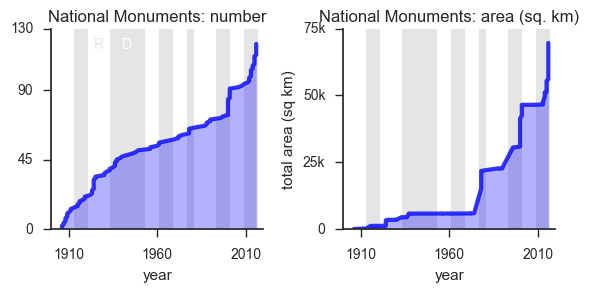

In [11]:
fig = plt.figure(figsize=(6,3)) # update size when area is added
nmax1 = plt.subplot(121) # update to 121
plt.fill_between(nm_sorted_years['year'], nm_sorted_years['Cum_Tot'],
                 color='b', lw=0, alpha=0.3);
plt.plot(nm_sorted_years['year'], nm_sorted_years['Cum_Tot'],
         color='b', lw=3, alpha=0.8);
sns.despine();
add_presidents(nmax1)
plt.xticks(np.arange(1910,2030,50));
plt.yticks([0, 45, 90, 130]);
plt.xlim(1900, 2020)
plt.ylim(0, 130)
plt.xlabel('year')
#plt.ylabel('total number')
plt.title('National Monuments: number')
plt.annotate('R', (1924, 117), color='0', alpha=0.1)
plt.annotate('D', (1940, 117), color='1')

nmax2 = plt.subplot(122)
plt.fill_between(nm_sorted_years['year'], nm_sorted_years['Cum_Area'],
                 color='b', alpha=0.3, lw=0);
plt.plot(nm_sorted_years['year'], nm_sorted_years['Cum_Area'],
         #marker='o', markerfacecolor='w', markeredgecolor='b',
         color='b', lw=3, alpha=0.8);
sns.despine();
add_presidents(nmax2, 3500000)
plt.xticks(np.arange(1910,2030,50));
plt.yticks([0, 25000, 50000, 75000], [0, '25k', '50k', '75k']);
plt.xlabel('year');
plt.xlim(1900, 2020)
plt.ylabel('total area (sq km)');
plt.title('National Monuments: area (sq. km)');
plt.tight_layout();
plt.savefig('national_monuments.png', dpi=300)

Note that the large marine monuments have been excluded.

## Conclusion

It is interesting that National Parks increase in a relatively consistent rate regardless of who (or which party) is President.  This was also true of National Monument until the most recent administrations.  There is a definite increase in designations during the Democrat administrations (Clinton, Obama) compared to the adjacent Republican administrations (Bush I, Bush II).

## Further Studies

1. How many National protected lands are there? By state? Total Area?
1. How much do these lands cost?  By area?  By state?
  1. Where does this money come from?
  1. What is it spent on?
  1. What is not being done? What project are being deferred due to lack of funding?
  1. What are the funding requests for each area?
1. Is there a database of roadside markers? http://photos.historical-markers.org/

## Change List
```
2016-12-30: First add, with National Parks and National Monuments.

```